In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# Welcome to CryptoFinCast! 

In this notebook we create a model to forcast cryptocurrency stock prices in order to gain profits.

In [2]:
# import the necessary libraries
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#  import tensorflow libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import os 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
# getting latest data
def get_data(stocks, start, end):
    df = pdr.get_data_yahoo(stocks, start, end)
    return df


In [5]:
crypto_tickers = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'DOGE-USD']

In [6]:
def LSTM_model(X_train):
    
    model = Sequential()
    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    return model

In [15]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

[*********************100%***********************]  1 of 1 completed
Data Preprocessing for BTC-USD Stocks
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
             

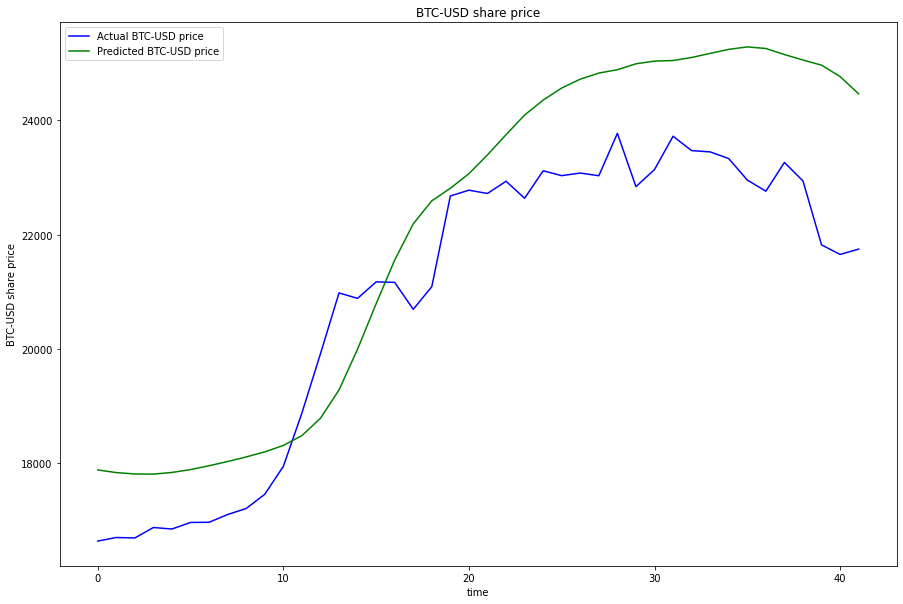

1/1 [==============================] - 2s 2s/step
prediction: [[24134.389]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for ETH-USD Stocks
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_15 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dr

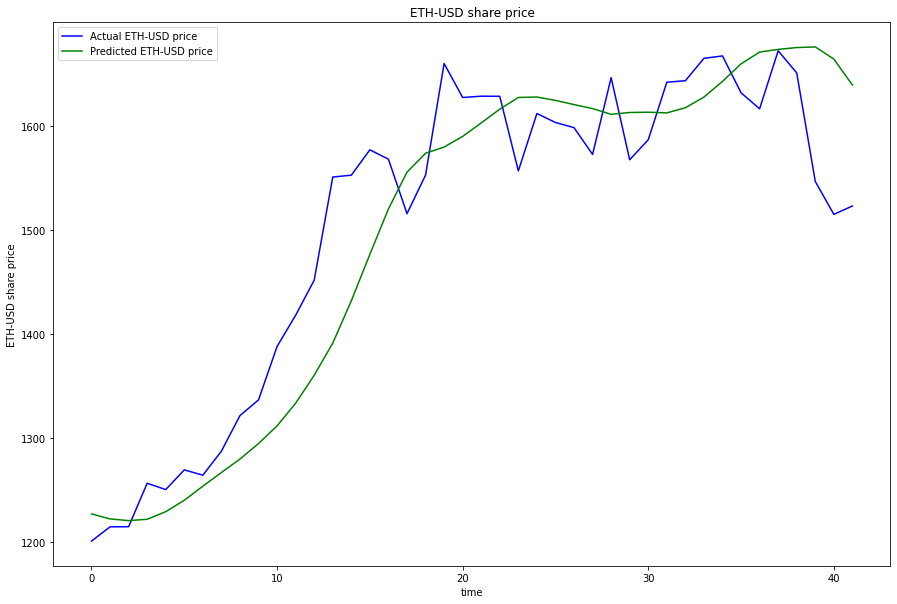

1/1 [==============================] - 1s 1s/step
prediction: [[1608.493]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for XRP-USD Stocks
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_19 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dro

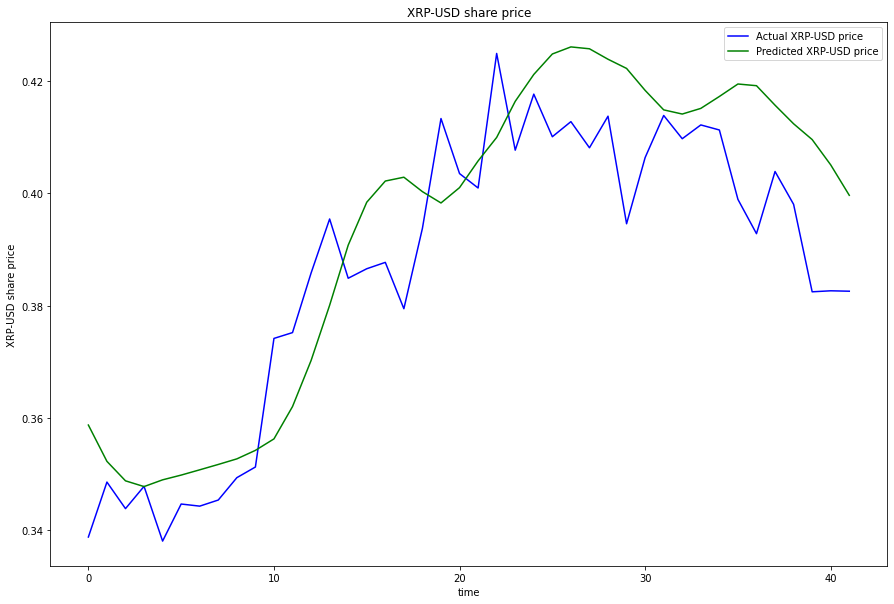

1/1 [==============================] - 1s 1s/step
prediction: [[0.39470914]]
[*********************100%***********************]  1 of 1 completed
Data Preprocessing for DOGE-USD Stocks
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 50)                20200     
                                                                 
 

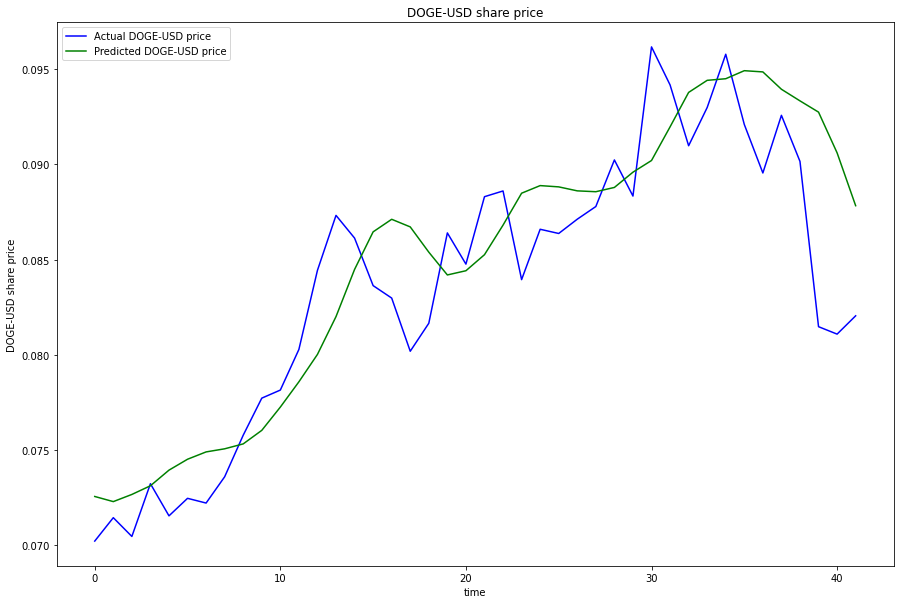

1/1 [==============================] - 1s 1s/step
prediction: [[0.08565759]]


In [16]:
# We try with another model to see if we get better predictions

for tick in crypto_tickers:
  prediction_days = 60
  scaler = MinMaxScaler(feature_range=(0,1))
  START_DATE = dt.datetime(2015,1,1)
  END_DATE = dt.datetime(2023,1,1)
  df = get_data(tick, START_DATE, END_DATE)
  scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))
  x_train = []
  y_train = []

  for x in range(prediction_days, len(scaled_data)):
      x_train.append(scaled_data[x - prediction_days:x, 0])
      y_train.append(scaled_data[x, 0])
  print(f"Data Preprocessing for {tick} Stocks")
  x_train, y_train = np.array(x_train), np.array(y_train)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  lstm = LSTM_model(x_train)
  lstm.summary()
  lstm.compile(optimizer='adam', 
                loss='mean_squared_error')
  checkpointer = ModelCheckpoint(filepath = tick+'_weights_best.hdf5', 
                               verbose = 2, 
                               save_best_only = True)

  lstm.fit(x_train, 
            y_train, 
            epochs=25, 
            batch_size = 32,
            callbacks = [checkpointer])
  END_DATE = dt.datetime(2023,1,1)

  START_DATE_TEST = END_DATE
  test_data = get_data(tick, START_DATE_TEST,dt.datetime.now())
  actual_prices = test_data['Close'].values

  total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

  lstm_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
  lstm_inputs = lstm_inputs.reshape(-1,1)
  lstm_inputs = scaler.transform(lstm_inputs)
  x_test = []
  for x in range(prediction_days, len(lstm_inputs)):
      x_test.append(lstm_inputs[x-prediction_days:x, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] ,1))

  predicted_prices = lstm.predict(x_test)
  predicted_prices = scaler.inverse_transform(predicted_prices)
    # save model 
  directory = "lstm_saved_model"
  parent_dir = "/content"
  path = os.path.join(parent_dir, directory)
  os.makedirs(path, exist_ok=True) 
  print("Directory '% s' created" % directory) 

  lstm.save('lstm_saved_model/'+tick+'_model')
  plt.figure(figsize=(15,10))
  plt.plot(actual_prices, color='blue', label=f"Actual {tick} price")
  plt.plot(predicted_prices, color= 'green', label=f"Predicted {tick} price")
  plt.title(f"{tick} share price")
  plt.xlabel("time")
  plt.ylabel(f"{tick} share price")
  plt.legend()
  plt.show()
  # predicting next day
  real_data = [lstm_inputs[len(lstm_inputs)+1 - prediction_days:len(lstm_inputs+1),0]]
  real_data = np.array(real_data)
  real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
  prediction = lstm.predict(real_data)
  prediction = scaler.inverse_transform(prediction)
  print(f"prediction: {prediction}")


In [9]:
!zip -r crypto_lstm_saved_model.zip lstm_saved_model/

  adding: lstm_saved_model/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/XRP-USD_model/variables/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/XRP-USD_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_model/XRP-USD_model/assets/ (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/fingerprint.pb (stored 0%)
  adding: lstm_saved_model/XRP-USD_model/saved_model.pb (deflated 91%)
  adding: lstm_saved_model/ETH-USD_model/ (stored 0%)
  adding: lstm_saved_model/ETH-USD_model/keras_metadata.pb (deflated 92%)
  adding: lstm_saved_model/ETH-USD_model/variables/ (stored 0%)
  adding: lstm_saved_model/ETH-USD_model/variables/variables.index (deflated 64%)
  adding: lstm_saved_model/ETH-USD_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: lstm_saved_m

In [10]:
from google.colab import files
files.download("/content/crypto_lstm_saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>